In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [39]:
class_names = ['T-shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

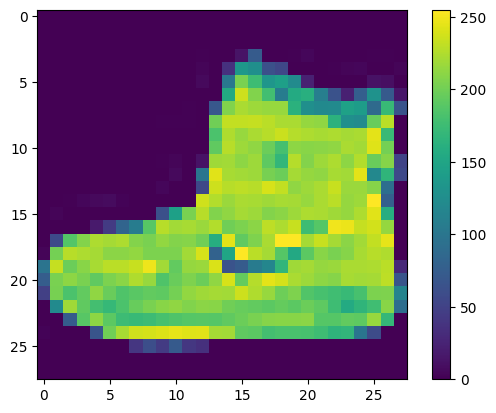

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [6]:
x_train = x_train / 255
x_test = x_test / 255

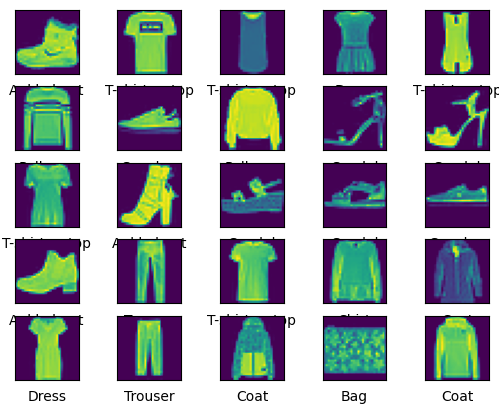

In [7]:
plt.figure()
for i in  range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])


In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128*2, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
    ])

In [9]:
model.compile(optimizer = tf.keras.optimizers.SGD(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2757 - accuracy: 0.9018
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9034
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2694 - accuracy: 0.9052
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9070
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9060
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9079
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9086
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9099
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2544 - accuracy: 0.9094
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accurasy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3203 - accuracy: 0.8951
Test accurasy: 0.8950999975204468


In [35]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
predictions[587]

array([8.7037817e-02, 9.2109316e-05, 1.2728639e-04, 2.3127621e-02,
       8.5613388e-04, 7.8759416e-11, 8.8873529e-01, 5.6034960e-08,
       2.3770081e-05, 3.7089345e-13], dtype=float32)

'T-shirt'

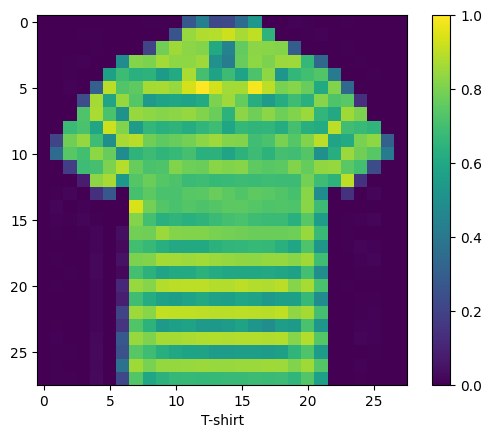

In [43]:
element = 547
plt.figure()
plt.imshow(x_test[element])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[np.argmax(predictions[element])])
class_names[np.argmax(predictions[element])]



In [42]:
print("Saving")
# Сохраняем сеть для последующего использования
# Генерируем описание модели в формате json
model_json = model.to_json()
json_file = open("../models/best_model.json", "w")
# Записываем архитектуру сети в файл
json_file.write(model_json)
json_file.close()
# Записываем данные о весах в файл
model.save_weights("../models/best_model.h5")
print("Succesful")

Saving
Succesful
